In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
%matplotlib inline

In [50]:
import pandas as pd

In [15]:
import csv

In [40]:
import seaborn as sns

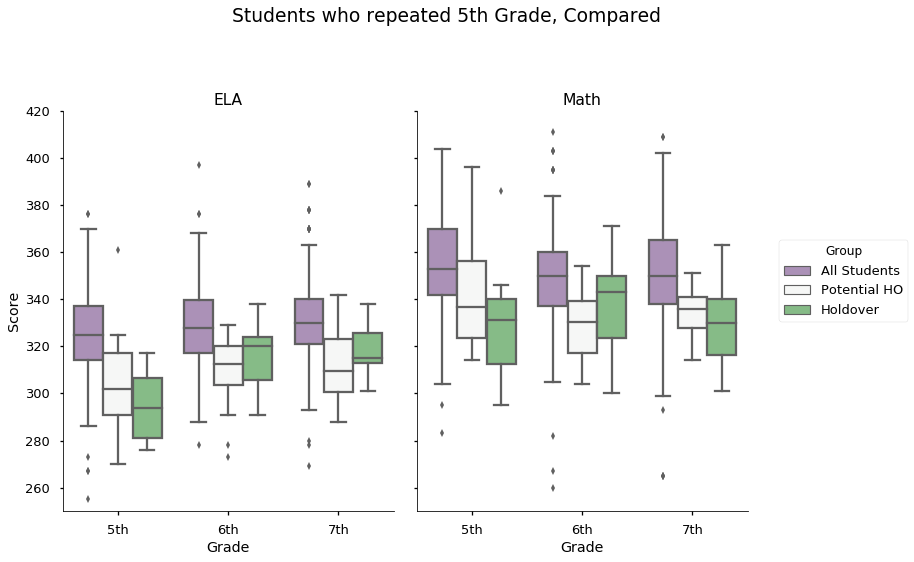

In [144]:
df = pd.read_csv("sns_g5_2014.csv")
g = sns.factorplot(x='Grade', y='Score', 
               hue='Group', col='Subject', 
               kind = 'box', size=8,
               palette = "PRGn", margin_titles=True,
               aspect=.7, data = df)
axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(250,420)
g.fig.suptitle("Students who repeated 5th Grade, Compared")
sns.set_context("talk")
plt.show()

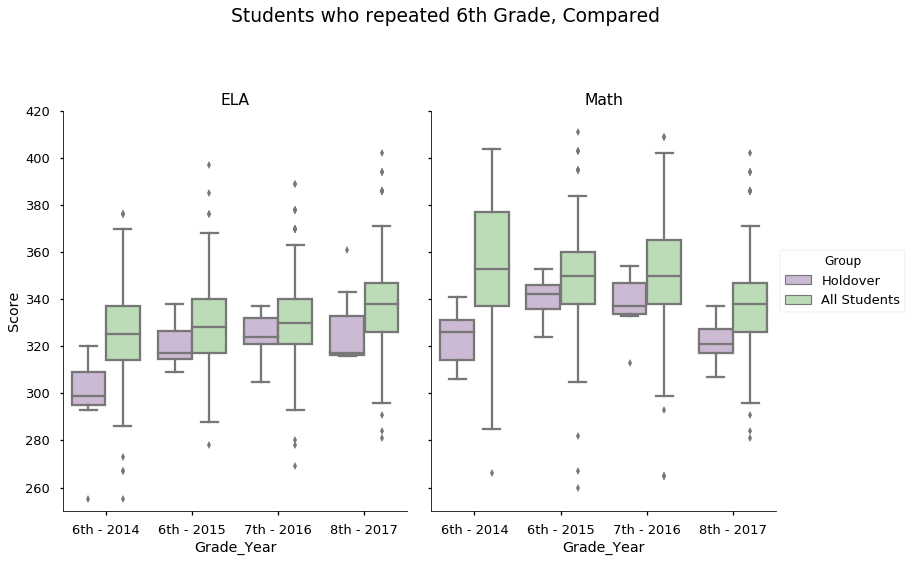

In [142]:
df_6 = pd.read_csv("sns_g6_2014.csv")
g = sns.factorplot(x='Grade_Year', y='Score', 
               hue='Group', col='Subject', 
               kind = 'box', size=8,
               palette = "PRGn",
               aspect=.7, data = df_6)
axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(250,420)
g.fig.suptitle("Students who repeated 6th Grade, Compared")
sns.set_context("talk")
plt.show()